In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Carregando base de dados
iris = datasets.load_iris()

# Visualizando quantos registros existem por classe
unicos, quantidade = np.unique(iris.target, return_counts=True)
unicos

array([0, 1, 2])

In [3]:
quantidade

array([50, 50, 50], dtype=int64)

In [4]:
# Agrupamento com k-means, utilizano 3 clusters
cluster = KMeans(n_clusters=3)
cluster.fit(iris.data)

KMeans(n_clusters=3)

In [6]:
# Visualização dos 3 centróides
centroides = cluster.cluster_centers_
centroides

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
# Visualiação dos grupos que cada registro foi associado
previsoes = cluster.labels_
previsoes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
# Contagem dos registros por classe
unicos2, quantidade2 = np.unique(previsoes, return_counts=True)
unicos2

array([0, 1, 2])

In [9]:
quantidade2

array([62, 50, 38], dtype=int64)

In [10]:
# Geração da matriz de contigência para comparar os grupos com a base de dados
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

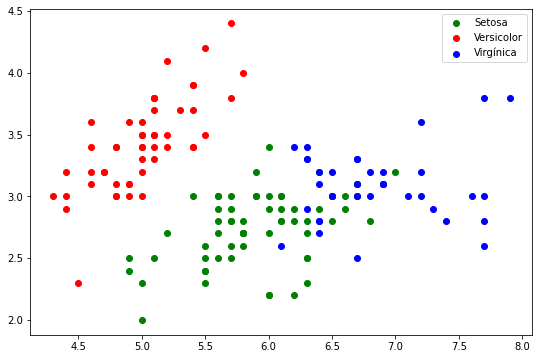

In [14]:
# Geração do gráfico com os clusters gerados, considerando para um (0, 1, 2)
# Usamos somente as colunas 0 e 2 da base de dados original para termos 2 dimensões
plt.figure(figsize=(9, 6))
plt.scatter(iris.data[previsoes == 0, 0], iris.data[previsoes == 0, 1],
            c = 'green', label = 'Setosa')
plt.scatter(iris.data[previsoes == 1, 0], iris.data[previsoes == 1, 1], c = 'red', label = 'Versicolor')
plt.scatter(iris.data[previsoes == 2, 0], iris.data[previsoes == 2, 1], c = 'blue', label = 'Virgínica')
plt.legend();